# Visualización de datos: 2.- Seaborn

## EDA Libros

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

## Sobre Seaborn

   - **Se basa en matplotlib**.
    
   - **Gráficos muy atractivos** y con algunas **utilidades adicionales sobre matplotlib**. 

   - **Documentación**: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

   - La librería tiene algunos **datasets de prueba** en:https://github.com/mwaskom/seaborn-data

## Carga de datos

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
titanic = sns.load_dataset("titanic") #Tiene un método para cargar datasets

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [21]:
# Filtro con todas las filas que no tienen nulls en la columna "age"
titanic = titanic[titanic.age.notnull()]

In [22]:
len(titanic)

714

## kdeplot()

**KDE: Kernel Density Estimation**: https://en.wikipedia.org/wiki/Kernel_density_estimation

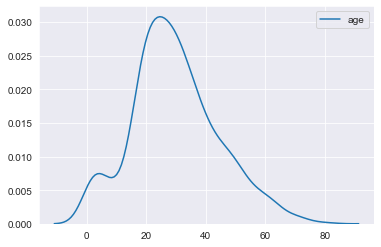

In [23]:
sns.kdeplot(titanic.age); #REPRESENTA LA DISTRIBUCIÓN DE PROBABILIDAD DE EDADES

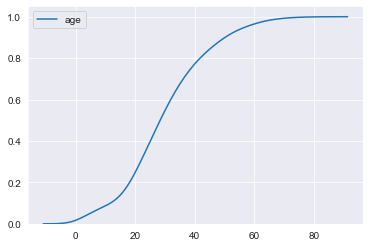

In [24]:
# ACUMULATIVO
sns.kdeplot(titanic.age, cumulative=True);

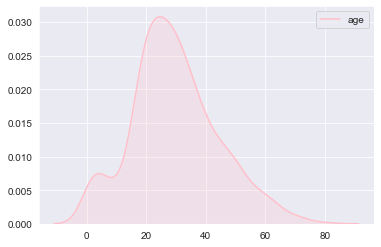

In [25]:
#ALGUNOS CAMBIOS DE FORMATO
sns.set_style('darkgrid')
sns.kdeplot(titanic.age,color='pink',shade=True)

#JUGAR CON LAS OPCIONES

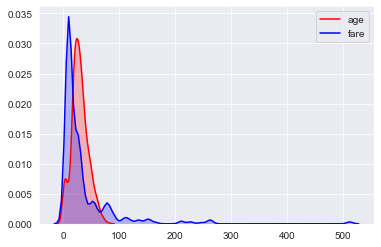

In [26]:
#REPRESENTANDO VARIAS GRÁFICAS A LA VEZ
sns.kdeplot(titanic.age,color='red',shade=True)
sns.kdeplot(titanic.fare,color='blue',shade=True)

## distplot()

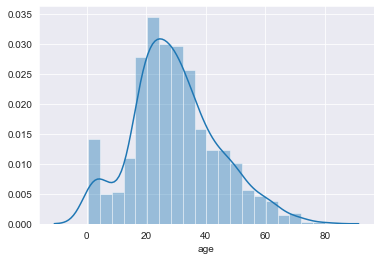

In [27]:
# distplot combina plt.hist con sns.kdeplot
sns.distplot(titanic.age) #KDE hace una aproximación suave del histograma.

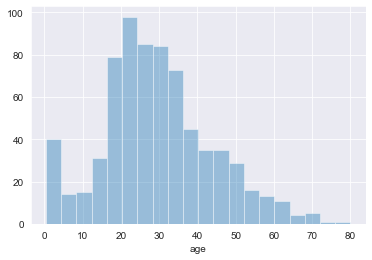

In [28]:
sns.distplot(titanic.age,kde=False)

## jointplot()

kde plot para comparar distribuciones de dos variables.

El **parámetro 'kind'** puede tener los **valores**:

   - scatter”
   - “reg”
   - “resid”
   - “kde”
   - “hex”

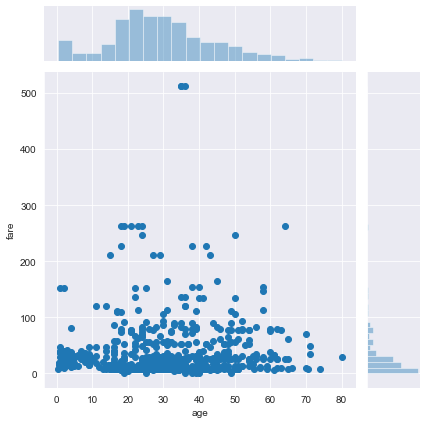

In [29]:
sns.jointplot(titanic.age,titanic.fare,kind='scatter')

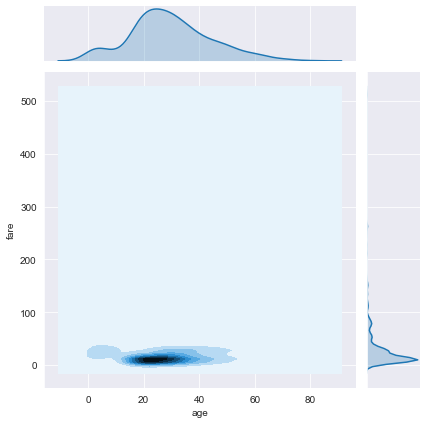

In [30]:
sns.jointplot(titanic.age,titanic.fare,kind='kde')

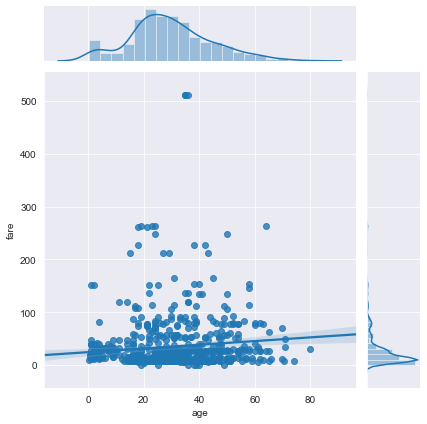

In [31]:
sns.jointplot(titanic.age,titanic.fare,kind='reg') #Representa una regresión lineal entre las dos variables.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

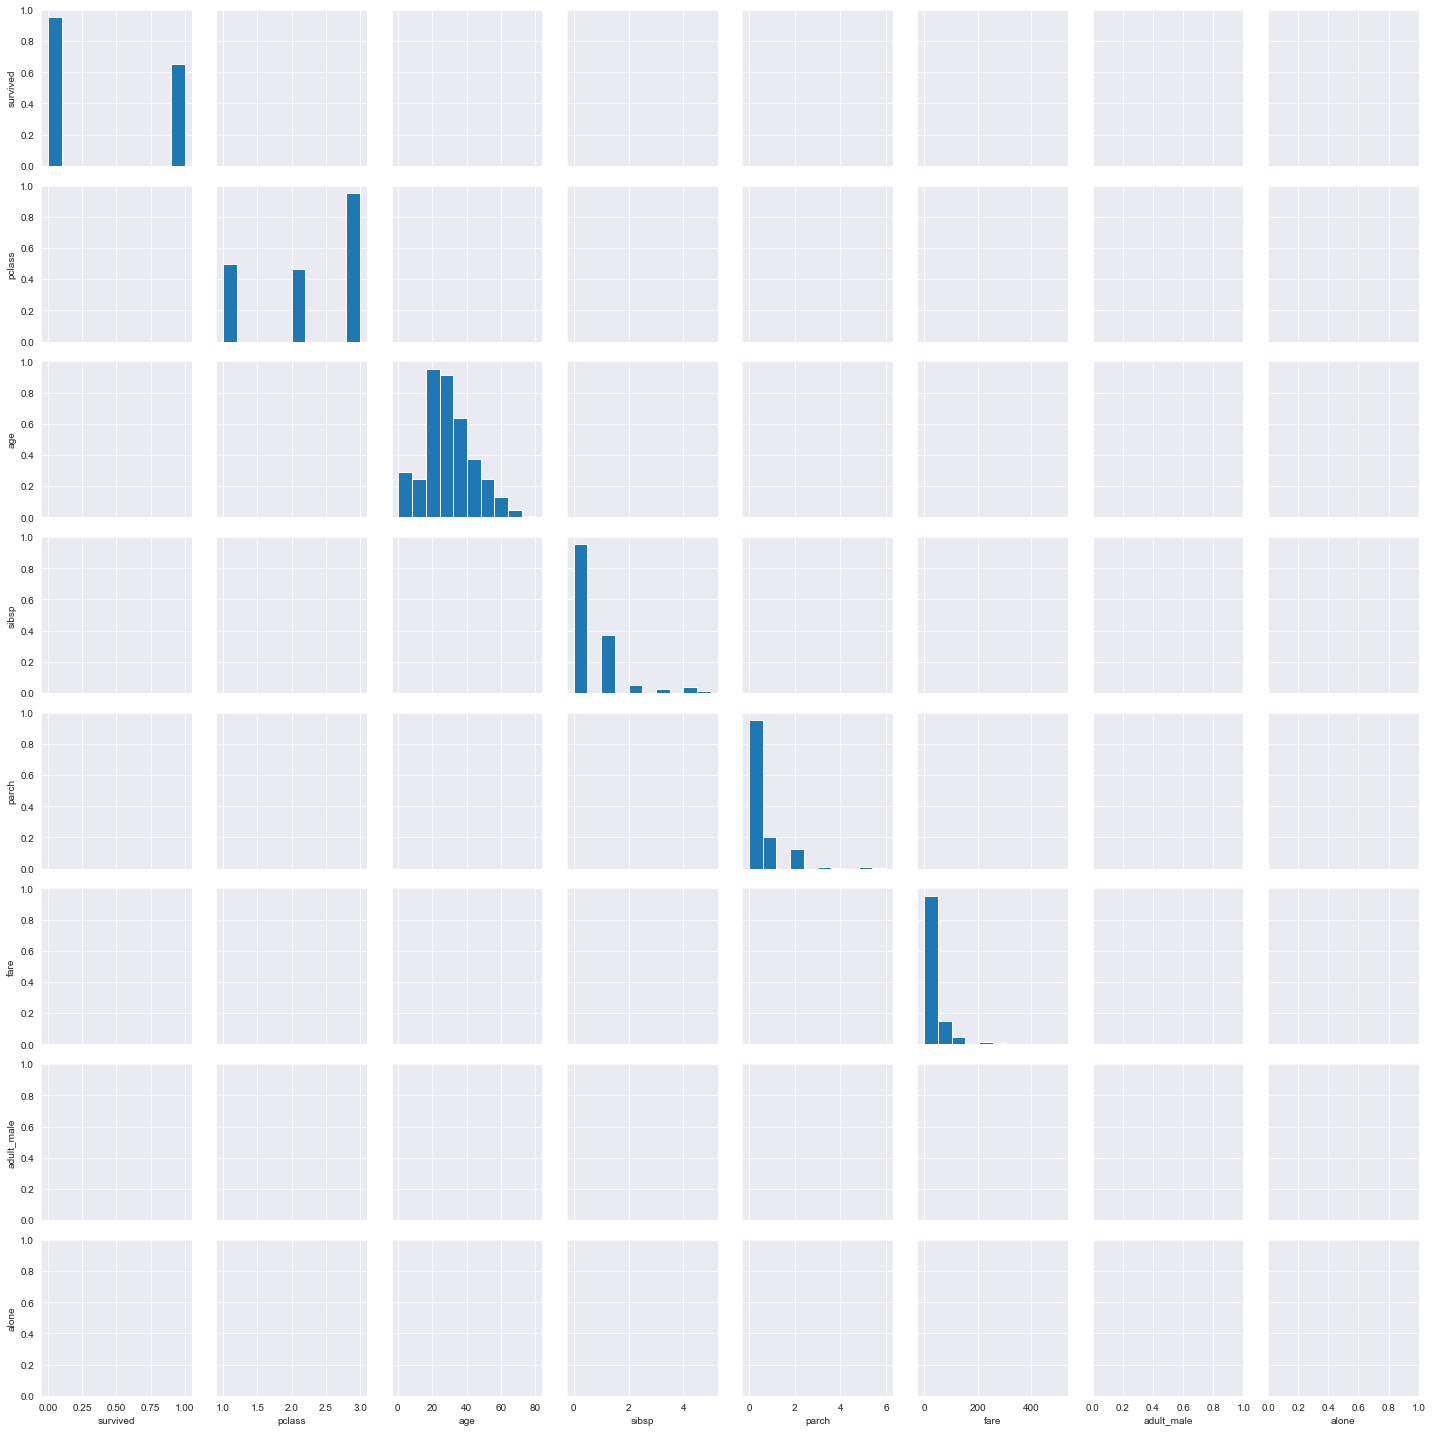

In [32]:
sns.pairplot(titanic) #Falla con las variables no numéricas. Hay que filtrarlas 

In [ ]:
print(titanic.dtypes)
labels=titanic.columns
labels_num=[]
for feat in labels:
    if titanic[feat].dtype=='int64':
        labels_num.append(feat)
    elif titanic[feat].dtype=='float64':
        labels_num.append(feat)
labels_num=np.array(labels_num)

titanic_numerical=titanic[labels_num]

In [ ]:
sns.pairplot(titanic_numerical)

In [ ]:
#EL MISMO GRAFICO SE PUEDE OBTENER DIRECTAMENTE DESDE PANDAS
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(titanic_numerical, figsize=(12,8))

In [ ]:
#Ahora queremos remarcar en el gráfico los valores que resultaron en survived=0 o survived=1 (ASOCIACIÓN CON EL TARGET)
sns.pairplot(titanic_numerical,hue='survived')

## heatmap()

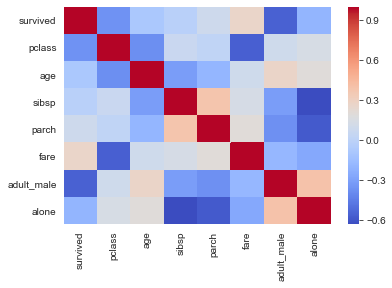

In [35]:
# VISUALIZACIÓN DE LAS CORRELACIONES ENTRE VARIABLES
correlation=titanic.corr() 
sns.heatmap(correlation,cmap='coolwarm') # Hay que pasarle una matriz a la función seaborn.

## clustermap()

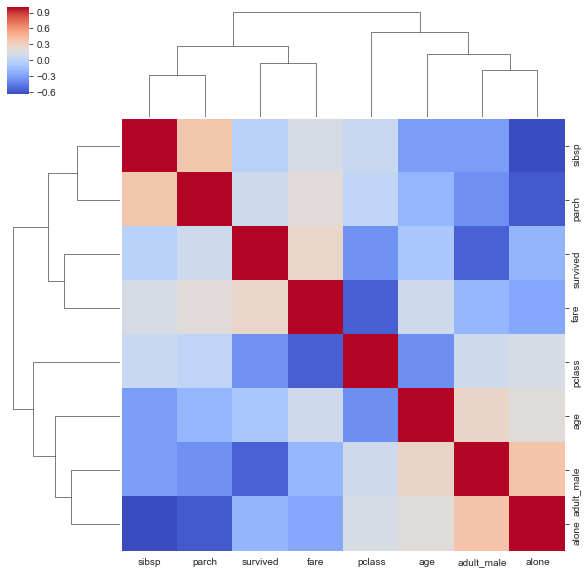

In [36]:
#DEVUELVE UN CLUSTERING DE LOS VALORES DE LA MATRIZ (EN ESTE CASO CLUSTERING DE CORRELACIÓN)
sns.clustermap(correlation,cmap='coolwarm')